### Homework 2
Modern Stellar Astrophysics 

Prof. Melissa Ness

Yasmeen Asali 

October 18th, 2018

In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

### Problem 2



In [ ]:
dt = [('x','f8'),('y','f8'),('z','f8'),('vx','f8'),('vy','f8'),('vz','f8')]
data = np.genfromtxt('modelR1GaiaChallenge',dtype=dt)
np.save('modelR1data',data)

In [2]:
modelR1data = np.load('modelR1data.npy')
print(np.shape(modelR1data))

(7489269,)


In [11]:
idx_cut = np.random.randint(0, 7489269, 50000)

In [12]:
x = modelR1data['x']
y = modelR1data['y']
z = modelR1data['z']

x = x[idx_cut]
y = y[idx_cut]
z = z[idx_cut]

In [13]:
size_cut = np.where((z<2) & (z>-2) & (x>-4) & (x<4))

x = x[size_cut]
y = y[size_cut]
z = z[size_cut]

In [15]:
#point density in xz plane
xz_num = np.vstack([x,z])
c_num = gaussian_kde(xz_num)(xz_num)

In [16]:
#sort by density, so that the densest points are plotted last
idx_dens = c_num.argsort()
x, z, c_num = x[idx_dens], z[idx_dens], c_num[idx_dens]

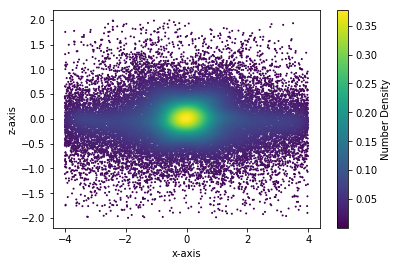

In [20]:
plt.scatter(x, z, c=c_num, s=1)
plt.xlabel("x-axis", size=10)
plt.ylabel("z-axis", size=10)
plt.colorbar().set_label("Number Density")
plt.show()

We can almost see an X feature in the above plot of 50,000 stars (more stars would just take too long to compute the density colorbar). Let's try an unsharp mask to see if that helps. 

In [31]:
#attempt to do a unsharp mask
%matplotlib inline

x_fake, z_fake = np.random.normal(0, 1, len(c_num)), np.random.normal(0, 1, len(c_num))

xz_fake = np.vstack([x_fake,z_fake])
c_fake = gaussian_kde(xz_fake)(xz_fake)

In [36]:
c_new = c_num / c_fake

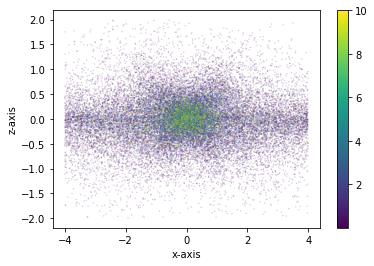

In [45]:
plt.scatter(x, z, c=c_new, s=0.01, vmax=10)
plt.xlabel("x-axis", size=10)
plt.ylabel("z-axis", size=10)
plt.colorbar()

So we kinda have an X shape? Let's try a 2D histogram with maybe a more professional unsharp mask (if I can figure that out). 

Since everything is already named and renamed, let's just reload the data again and start anew.

In [46]:
x = modelR1data['x']
y = modelR1data['y']
z = modelR1data['z']

/Users/yasmeenasali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


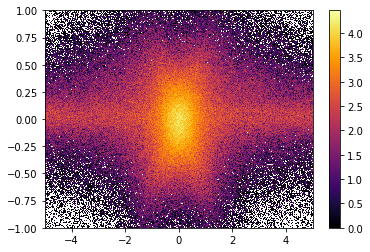

In [69]:
#making 2D histograms 
N = 0.005
bins_x = np.arange(-15, 15, step=N)
bins_z = np.arange(-5, 5, step=N)

hist = np.histogram2d(z, x,
                     bins=(bins_z, bins_x))

plt.imshow(np.log(hist[0]), aspect='auto', extent=[min(bins_x), max(bins_x), min(bins_z), max(bins_z)],
          interpolation='nearest', cmap='inferno')
plt.xlim(-5,5)
plt.ylim(-1,1)
plt.colorbar()

Wow look at that x! 

In [51]:
#another less cool way to make histograms
#plt.hist2d(x,z, bins=100)

### Problem 3

**Part a)**

The Kelvin Helmholtz mechanism theorizes that stars or planets (Jupiter in this case) that are not in hydrostatic equilibrium will undergo contraction as the surface cools, causing an increase in core temperature which prevents the planet from collapsing immediately. The thermal timescale is the amount of time this mechanism can persist before all of Jupiter's energy is radiated away. It can be calculated using the following formula:  

$$ \tau_{th} = \frac{\Delta{E_{g}}}{L} = \frac{GM^2}{RL} $$

Solving this equation below, we find Jupiter's thermal timescale is 321 gigayears. Since Jupiter is only 4.5 Gyr old, gravitational contraction could have power its luminosity for its entire lifetime, so we cannot assume it is in hydrostatic equilibrium. 

In [3]:
def ts_thermal(M, R, L):
    G = 6.64e-8 * (u.cm)**3 / (u.g * (u.s)**(2))
    t_in_seconds = (G*(M**2))/(R*L)
    t_in_Gyr = t_in_seconds * (3.17e-17 * u.Gyr / u.s)
    return t_in_Gyr

M_jup = 1.9e30 * u.g
R_jup = 7.1e9 * u.cm
L_jup = 8.7e-10 * (3.83e33 * u.g * (u.cm)**2 * (u.s)**(-3))

print(ts_thermal(M_jup, R_jup, L_jup))

321.18715474021167 Gyr


**Part b)**

If Jupiter's radius is shrinking only due to radiation we can set up conservation of energy by equating the amount of energy lost in gravitational potential energy to the amoutn of energy emitted in luminosity:

$$ \Delta{E_{g}} = \Delta{E_{emitted}} $$
$$ \frac{GM^2}{r(t)} = Lt $$

We can take the time derivative of both sides, noting that since the star is contracting, radius is no longer a constant but now a function of time. 

$$ \frac{d}{dt}(\frac{GM^2}{r(t)}) = L $$

Using the recipricol rule for derivatives

$$ \frac{-GM^2}{r(t)^2}\frac{dr(t)}{dt} = L $$
$$ \frac{dr(t)}{dt} = \frac{-Lr(t)^2}{GM^2} $$

We are trying to find the rate at a given time (now), so we can substitute $ r(t) = R_{jupiter} $. Also, since we know that the radius is contracting, we can ignore the negative sign and calculate the rate

In [30]:
def contr_rate(M, R, L):
    G = 6.64e-8 * (u.cm)**3 / (u.g * (u.s)**(2))
    return (L*R**2)/(G*M**2)
def convert_to_year_per_sec(value):
    return value * (u.s / (3.17098e-8 * u.yr))

print(contr_rate(M_jup, R_jup, L_jup))
print(convert_to_year_per_sec(contr_rate(M_jup, R_jup, L_jup)))

7.007440885425358e-10 cm / s
0.022098659989736164 cm / yr


Our value is 0.02 cm per year, which is 2 orders of magnitude off of the actual value of 2 cm per year (**source**). This offset can be attributed to the fact that we assumed a simplified equation of the gravitational potential energy, ignoring the factor that arises from the density distribution. 

### Problem 4

** Part a) ** 

We can start by taking the derivative of the given equation for $\tau$:

$$ \frac{d\tau}{dT} = - \frac{(\frac{27E_{G}}{UKT})^{1/3}}{3T} $$
$$ \frac{d\tau}{dT} = - \frac{\tau}{3T} $$

Taking the log of the given equation for $R_{AB}$:

$$ \ln{R_{AB}} = \ln{(C\tau^2e^{-\tau})} $$
$$ \ln{R_{AB}} = \ln{C} - \ln{e^{-\tau}} + 2\ln{\tau} $$
$$ \ln{R_{AB}} = \ln{C} - \tau + 2\ln{\tau} $$

Rearranging the above equation for derivative of $\tau$ we find:

$$ \frac{d\tau}{\tau} = - \frac{dT}{3T} $$

and we can represent the right side of this equation as: 

$$ \frac{d\tau}{\tau} = - \frac{1}{3}d\ln{T} $$
$$ -3\frac{d\tau}{\tau} = d\ln{T} $$

so we can show that:

$$ \frac{d\ln{R_{AB}}}{d\ln{T}} = \frac{d\ln{R_{AB}}\tau}{-3{d\tau}} $$
$$ \frac{d\ln{R_{AB}}}{d\ln{T}} = - \frac{\tau}{3}\frac{d}{d\tau}(\ln{C} - \tau + 2\ln{\tau}) $$
$$ \frac{d\ln{R_{AB}}}{d\ln{T}} = - \frac{\tau}{3}(\frac{2}{\tau} - 1) $$

$$ \boxed{\frac{d\ln{R_{AB}}}{d\ln{T}} = \frac{\tau}{3} - \frac{2}{3}} $$


**Part b)**

### Problem 5

**Part a)**

The mean free path ${l}$ tells us how far we can see through the Earth's atmosphere, and it is given by:

$$ l = (\kappa\rho)^{-1} $$

Plugging in the given values we get:

In [9]:
op_E = 0.264 * u.cm**2 / u.g
dens_E = 1.2e-3 * u.g / u.cm**3
mfp_E = 1 / (op_E*dens_E)

print(mfp_E)

3156.5656565656564 cm


** Part b) **

Using the same formula, we can calculate the mean free path for a photon in the sun

In [23]:
op_S = 1.16 * u.cm**2 / u.g
dens_S = 162 * u.g / u.cm**3
mfp_S = 1 / (op_S*dens_S)

print(mfp_S)

0.005321413367390379 cm


** Part c) **

Distance travelled by a photon can be expresed as:

$$ d = \sqrt{N}l $$

For a photon coming from the center of the Sun to its surface, $ d = R_{\odot} $. So the number of steps is

$$ N = \frac{R_{\odot}^2}{l^2} $$

So here $N$ signifies the number of random steps a photon. This photon will travel a distance $l$ per random step, so the total distance travelled is

$$ D = Nl $$

and so we can express the amount of time it takes (considering the constant speed of light) as:

$$ t = \frac{Nl}{c} = \frac{R_{\odot}^2}{lc} $$

Plugging in our values we get that it will take a photon 960,393 years to travel from the center to the surface of the Sun. Crazy! 

In [31]:
R_sun = 6.95e10 * u.cm
c = 2.997e10 * u.cm / u.s
t_photon = (R_sun**2 ) / (mfp_S * c)

def convert_to_year(value):
    return value * (3.17098e-8 * u.yr) / u.s

print(t_photon)
print(convert_to_year(t_photon))

30286972972972.973 s
960393.8555783783 yr
